### Load libraries

In [1]:
import UrbanSound8K_dataprep as U
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Parameters

In [48]:
# general parameters
PATH = "data"
SAMPLE_RATE = 44100     # targeted sample for all files
NUM_OF_SAMPLES = 44100  # targeted number of sample of each file

# parameters for feature extraction (melspectrograms and mfcc)
N_FFT = 1024
HOP_LENGTH = 512
N_MELS = 64
N_MFCC = 13

### Load metadata

In [51]:
dataset = U.UrbanSoundPrep(PATH, 
                           resample_rate=SAMPLE_RATE,
                           number_of_samples=NUM_OF_SAMPLES)
df = dataset.metadata

### Data exploration

In [3]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [4]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [5]:
length = dataset.get_dataset_length()
length

8732

In [6]:
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [7]:
class_percentage = (df['class'].value_counts() / length) * 100
class_percentage

dog_bark            11.452130
children_playing    11.452130
air_conditioner     11.452130
street_music        11.452130
engine_idling       11.452130
jackhammer          11.452130
drilling            11.452130
siren               10.639029
car_horn             4.912964
gun_shot             4.283097
Name: class, dtype: float64

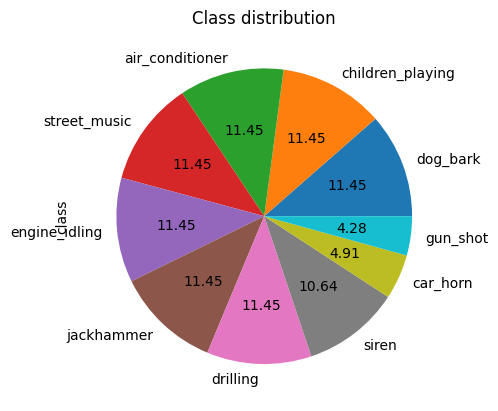

In [8]:
df['class'].value_counts().plot.pie(autopct='%.2f')
plt.title("Class distribution")
plt.savefig("figures/class_distribution.png", bbox_inches='tight')

In [26]:
df['durations'] = df['end'] - df['start']
df

,slice_file_name,fsID,start,end,salience,fold,classID,class,durations
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,4.000000
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,4.000000
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,4.000000
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,4.000000
...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn,4.000000
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,2.142545
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,3.505983
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,2.532098


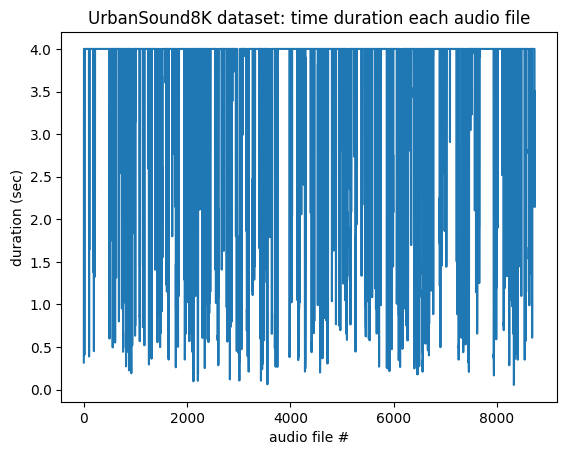

In [27]:
df.durations.plot()
plt.xlabel("audio file #")
plt.ylabel("duration (sec)")
plt.title("UrbanSound8K dataset: time duration each audio file")
plt.savefig("figures/durations.png", bbox_inches='tight')

In [25]:
df['durations'].describe()

count    8732.000000
mean        3.607904
std         0.973570
min         0.054517
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: durations, dtype: float64

In [35]:
df_short = df[df['durations'] < 4]
df_short

,slice_file_name,fsID,start,end,salience,fold,classID,class,durations
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn,0.648525
10,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn,1.053853
11,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn,0.405328
12,100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn,1.621311
...,...,...,...,...,...,...,...,...,...
8681,99185-3-0-0.wav,99185,0.341411,0.950911,1,5,3,dog_bark,0.609500
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,2.142545
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,3.505983
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,2.532098


### Check if all files have the same sample rate

In [38]:
sample_rates = []
number_of_channels = []
number_of_samples = []
for i in range(0,100):
    waveform, sample_rate, label = dataset.get_raw_waveform(i)
    
    number_of_channels.append(waveform.shape[0])
    number_of_samples.append(waveform.shape[1])
    sample_rates.append(sample_rate)    

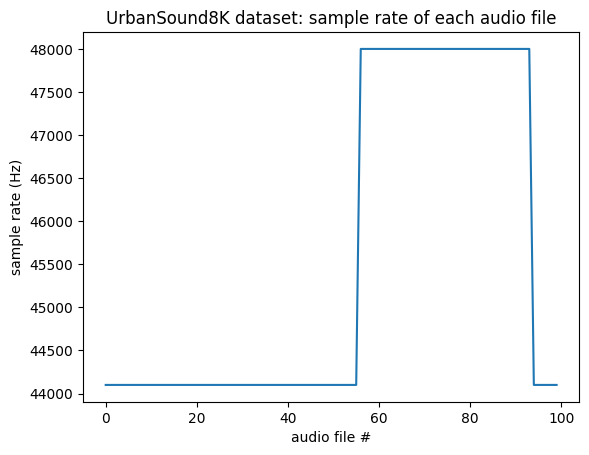

In [39]:
plt.figure()
plt.plot(sample_rates)
plt.xlabel("audio file #")
plt.ylabel("sample rate (Hz)")
plt.title("UrbanSound8K dataset: sample rate of each audio file")
plt.savefig("figures/sample_rates.png", bbox_inches='tight')

In [ ]:
np.mean(sample_rates)

In [ ]:
min(sample_rates)

In [ ]:
max(sample_rates)

In [ ]:
number_of_channels_df = pd.DataFrame()
number_of_channels_df['channels'] = number_of_channels
number_of_channels_df['channels'].value_counts().plot.bar()
plt.xlabel("Channels (#)")
plt.ylabel("Files (#)")

plt.title("UrbanSound8K dataset: channels of each audio file")
plt.savefig("figures/number_of_channels.png", bbox_inches='tight')

In [ ]:
plt.figure()
plt.plot(number_of_samples)
plt.xlabel("audio file #")
plt.ylabel("samples (#)")
plt.title("UrbanSound8K dataset: number of samples of each audio file")
plt.savefig("figures/number_of_samples.png", bbox_inches='tight')

In [ ]:
waveform, sample_rate, label = dataset.get_raw_waveform(1)

In [ ]:
num_channels, samples = waveform.shape
num_channels

In [ ]:
samples

### Check process pipeline when up-sampling

In [ ]:
waveform, sample_rate, label = dataset.get_raw_waveform(0)
dataset.plot_waveform(waveform, sample_rate, label)

In [ ]:
print("Raw waveform")
print("The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

In [ ]:
waveform, sample_rate, label = dataset.get_processed_waveform(0)
dataset.plot_waveform(waveform, sample_rate, label)

In [ ]:
print("Processed waveform")
print(" The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

### Check process pipeline when down-sampling

In [ ]:
waveform, sample_rate, label = dataset.get_raw_waveform(10)
dataset.plot_waveform(waveform, sample_rate, label)

In [ ]:
print("Raw waveform")
print(" The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

In [ ]:
waveform, sample_rate, label = dataset.get_processed_waveform(10)
dataset.plot_waveform(waveform, sample_rate, label)

In [ ]:
print("Processed waveform")
print(" The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

In [ ]:
import torch
def plot_spectrogram(waveform, end):
    waveform = waveform[:10]
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(label)

plot_spectrogram(waveform, 22050)

In [ ]:
num_of_samples = waveform.shape[1]
num_of_samples

In [ ]:
num_of_missing_samples = 22050 - num_of_samples
num_of_missing_samples

In [ ]:
last_dimension_padding = (0, num_of_missing_samples)
last_dimension_padding

In [ ]:
import torch
waveform = torch.nn.functional.pad(waveform, (0, 8046))

In [ ]:
import torch
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
    
print(device)

### Check resampler

In [ ]:
waveform, sample_rate, label = dataset.get_raw_waveform(0)

In [ ]:
waveform.shape

In [ ]:
sample_rate

In [ ]:
import torchaudio.transforms as T
resampler = T.Resample(sample_rate, 22050)
resampled_waveform = resampler(waveform)

In [ ]:
resampled_waveform.shape

### Some visualizations

In [42]:
labels = dataset.class_mapping

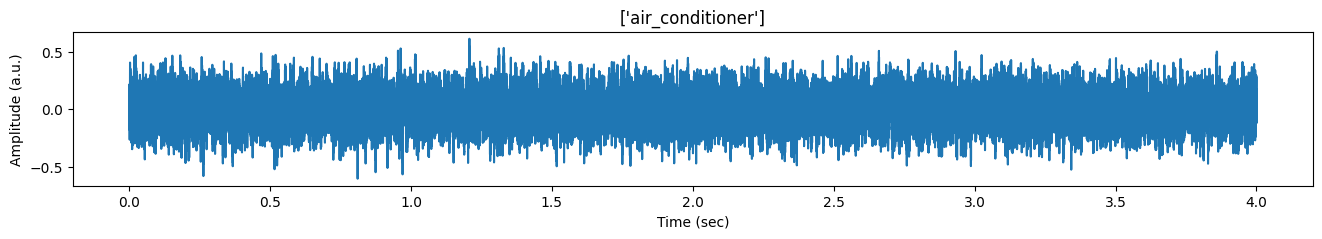

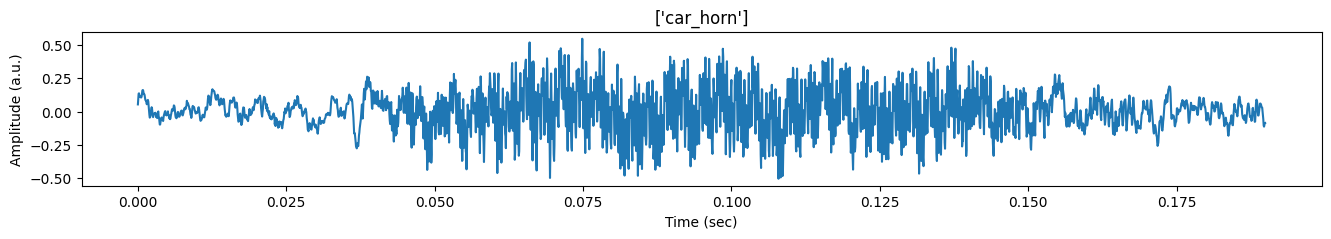

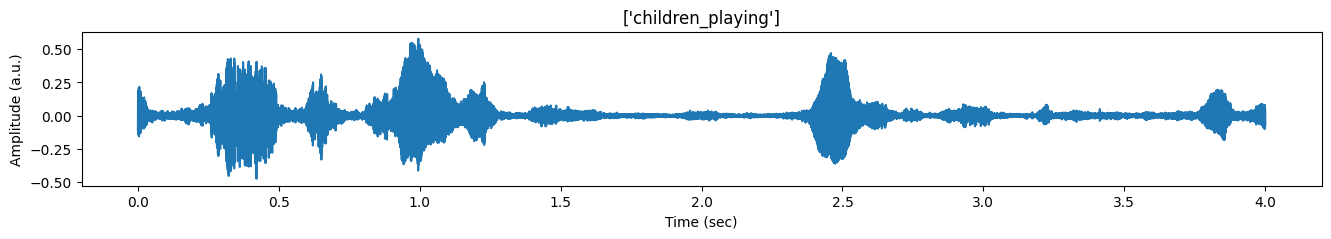

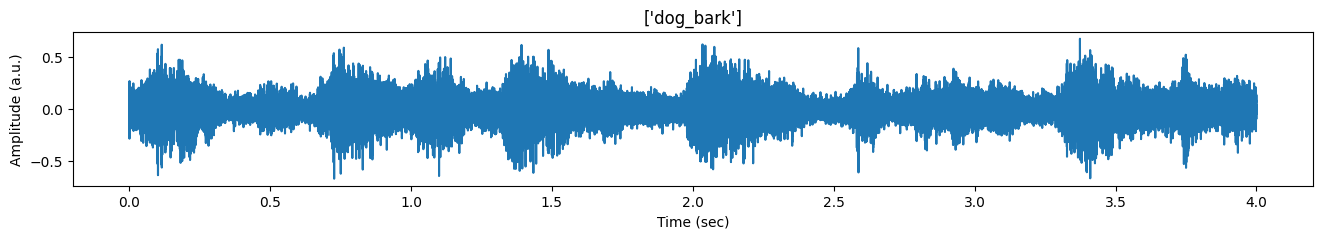

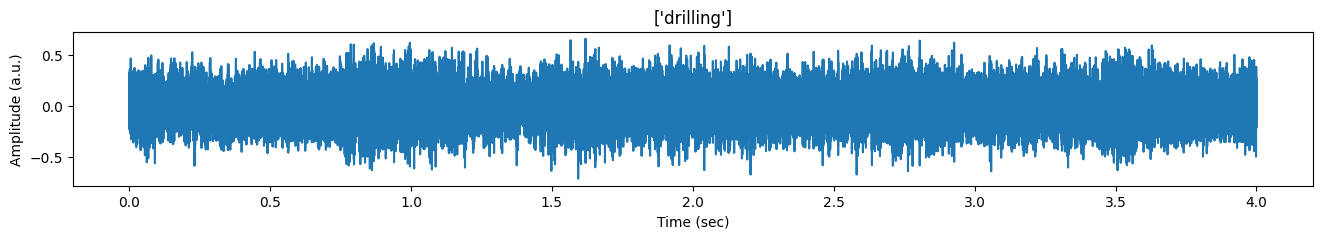

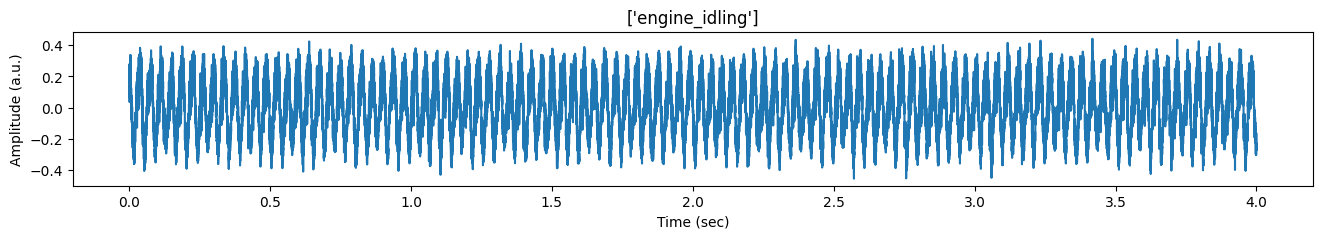

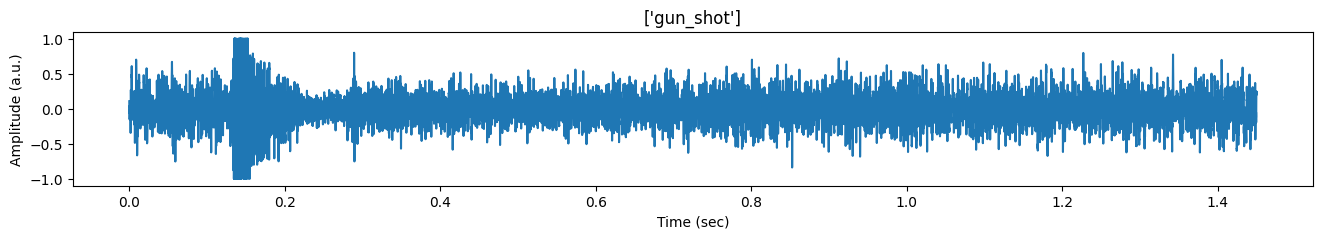

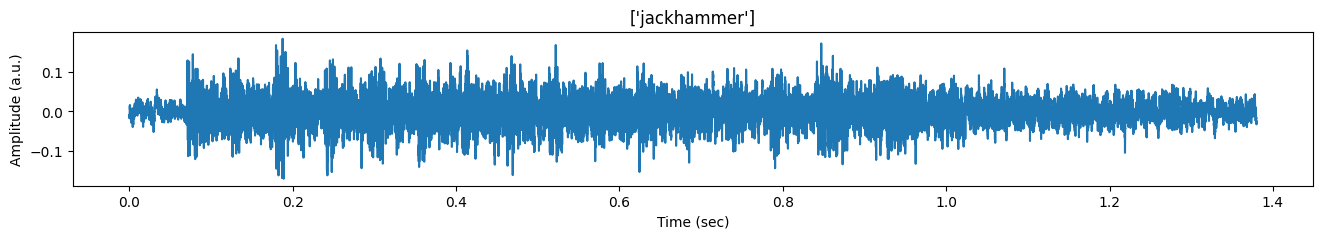

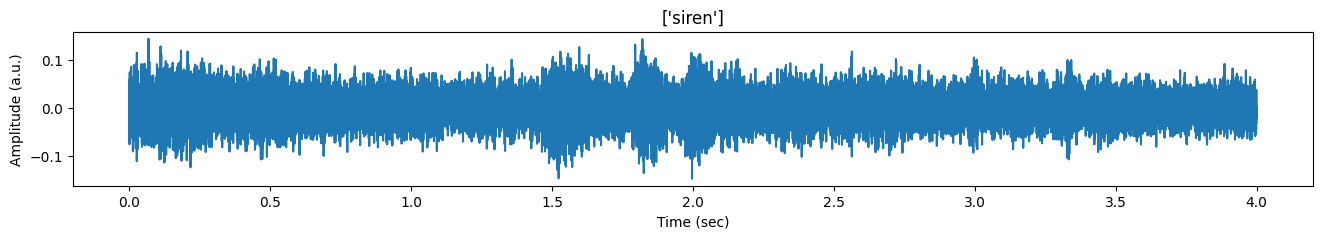

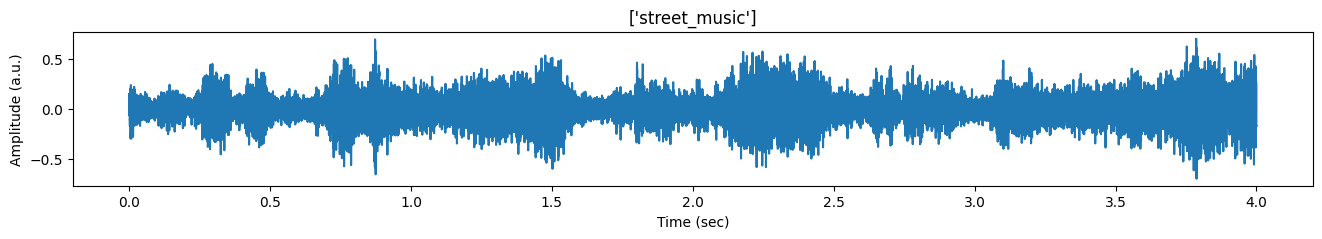

In [57]:
import torch
def plot_waveform(waveform, sample_rate, label):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    
    figure = plt.figure(figsize=(16,2))
    
    plt.plot(time_axis, waveform[0])
    key = [k for k, v in labels.items() if v == label]
    plt.title(key)
    plt.xlabel('Time (sec)')
    plt.ylabel('Amplitude (a.u.)')


sample_idx = 10
for label in labels.keys():
    index = df.index[df['class']==label].tolist()
    waveform, sample_rate, label = dataset.get_raw_waveform(index[sample_idx])
    plot_waveform(waveform, sample_rate, label)
#     dataset.plot_waveform(waveform, sample_rate, label)

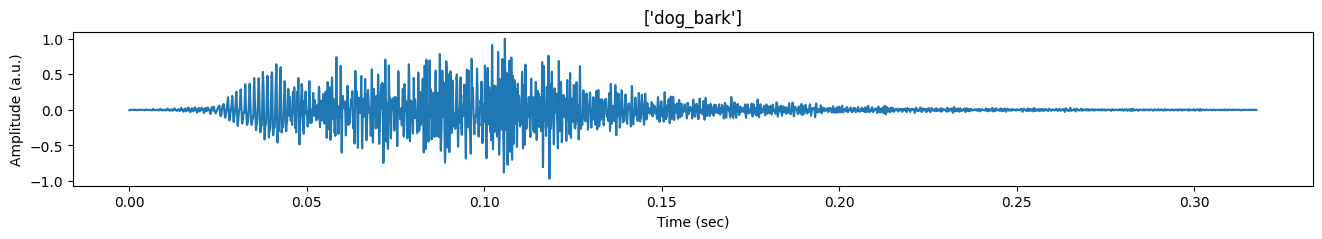

In [69]:
    waveform, sample_rate, label = dataset.get_raw_waveform(0)
    plot_waveform(waveform, sample_rate, label)

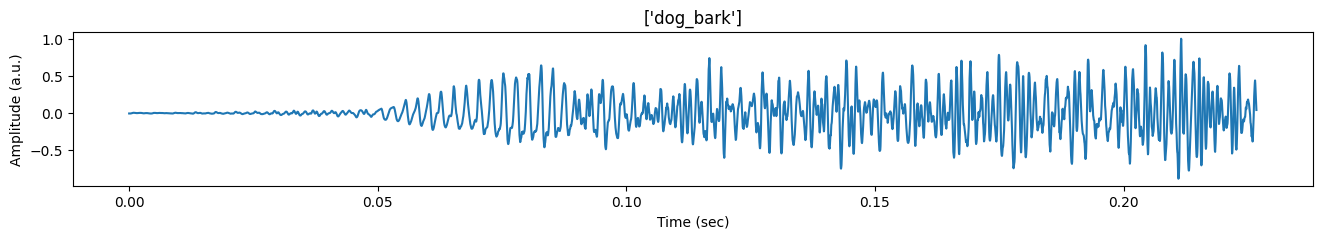

In [72]:
    dataset = U.UrbanSoundPrep(PATH, 
                           resample_rate=22050,
                           number_of_samples=5000)
    
    waveform, sample_rate, label = dataset.get_processed_waveform(0)
    plot_waveform(waveform, sample_rate, label)

In [ ]:
sample_idx = 10
for label in labels.keys():
    index = df.index[df['class']==label].tolist()
    waveform, sample_rate, label = dataset.get_processd_waveform(index[sample_idx])
    plot_waveform(waveform, sample_rate, label)
#     dataset.plot_waveform(waveform, sample_rate, label)

In [ ]:
### sample_idx = 10
for label in labels.keys():
    index = df.index[df['class'] == label].tolist()
    
    waveform, sample_rate, label = dataset.get_processed_waveform(index[sample_idx])
    mel_spectro = dataset.calc_mel_spec(waveform)

    dataset.plot_spectrogram(mel_spectro[0])
    plt.show()

In [ ]:
waveform, sample_rate, label = dataset.get_processed_waveform(index[sample_idx])
mel_spectro = dataset.calc_mel_spec(waveform)

In [ ]:
sample_idx = 10
for label in labels.keys():
    index = df.index[df['class'] == label].tolist()

    waveform, sample_rate, label = dataset.get_processed_waveform(index[sample_idx])
    
    mfcc = dataset.calc_mfcc(waveform)

    dataset.plot_spectrogram(mfcc[0])
    plt.show()

In [ ]:
3